# visualización de Datos y Ajuste de Curvas - Pandas
**Por:** Jhonny leonardo Camacho cortes - 2210714


Para el siguiente Nootebook veremos datos del 2010 sobre el consumo de electricidad de una casa cituada en Sceaux, Francia; dichos datos deberán ser leídos con la biblioteca `Pandas` y posteriormente graficados para una mejor visualización de estos mismos a lo largo del tiempo. Como ejercicio, se plateará un ajuste en los datos para hallar un valor promedio general de estos,
pero así también se proporcionará un error en dicha aproximación de datos.

## Metodología
Fundamentalmente, el ejercicio consistirá de:
+   Leer los datos de consumo de electricidad con la biblioteca `Pandas`.
+   El consumo de energía y la energía global reactiva están dados en una unidad de tiempo de minutos, de forma que podamos trabajar con una unidad de ''$Voltios/hora$'' lo que haremos será multiplicar estos datos por 1000/60.
+   Puesto que son 4 los archivos a leer, se deberá hacer una concatenación de los cuatro archivos.
+   Luego de concatenados los archivos, haremos un `resample`, un ajuste en los tados de tal forma que se disminuya la cantidad de datos por archivo y tengamos un promedio de estos en meses y días, además de los datos originales.
+   Graficar los datos con su respectivo ajuste de curva.
+   Finalmente, comparar los datos con su resample y dar un veredicto de qué datos, según su resample, tienen un menor error de aproximación.

Como primer paso, importamos las bibliotecas que necesitaremos para el avanzar en el ejercicio.
+   `numpy` nos permitirá hacer unos pocos arreglos necesarios.
+    `matplotlib` será necesaria para graficar los datos.
+    `scipy` nos será útil para hacer el ajuste de los datos planteados en el ejercicio.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

Seguidamente, lo que haremos será leer los datos que necesitamos, los mismos mencionados a comienzo del Notebook.
Los archivos son:
+   Global_active_power.csv
+    Global_intensity.csv
+    Voltage.csv
+    Global_reactive_power.csv

In [101]:
data_active_power = pd.read_csv("datas/Global_active_power.csv",delimiter=",",header=0)
data_intensity = pd.read_csv("datas/Global_intensity.csv",delimiter=",",header=0)
data_reactive_power = pd.read_csv("datas/Global_reactive_power.csv",delimiter=",",header=0)
data_Voltage = pd.read_csv("datas/Voltage.csv",delimiter=",",header=0)

Con ayuda de la función `merge` haremos de los anteriores 4 archivos un solo `DataFrame`.

In [102]:
result1 = pd.merge(data_active_power, data_intensity, on='Datetime')

In [103]:
result2 = pd.merge(result1,data_reactive_power, on='Datetime')

In [104]:
#data con la merge puesta (toda dataframe en uno)
result3 = pd.merge(result2,data_Voltage, on='Datetime')

Finalmente tenemos toda una DataFrame los 4 archivos juntos.

In [105]:
result3

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


El siguiente paso a hacer, será multiplicar los datos de energía activa consumida y energía reactiva consumida por $1000/60$ de forma tal que tengamos unidades de $Voltios/hora$.

In [106]:
result3['Global_active_power_1060'] = result3['Global_active_power']*1000/60
result3['Global_reactive_power_1060'] = result3['Global_reactive_power']*1000/60

In [107]:
result3

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Global_active_power_1060,Global_reactive_power_1060
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65,29.833333,3.933333
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07,29.666667,3.900000
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15,29.666667,3.900000
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26,29.100000,3.100000
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12,28.100000,1.700000
...,...,...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43,15.766667,0.000000
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00,15.733333,0.000000
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82,15.633333,0.000000
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70,15.566667,0.000000


Lo siguiente hacer será crear un índice de tiempo en el Dataframe para que podamos hacer su respectivo resample.

In [108]:
#Creamos un index para poder hacer el resample
result3['Datetime']=pd.to_datetime(result3['Datetime'], dayfirst = True)
result3=result3.set_index(['Datetime'])

Creado el índice, procedemos a utilizar el método `resample` para hacer el ajuste que queremos.

In [109]:
#Hacemos un resample por días 
data_day=result3.resample('D').mean()

In [110]:
#resample por meses
data_month=data_day.resample('M').mean()

In [111]:
#Echamos un vistazo a uno de los DataFrames para ver cómo va la vaina c:
data_month

,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Global_active_power_1060,Global_reactive_power_1060
Datetime,,,,,,
2010-01-31,1.321841,5.519323,0.128208,242.372555,22.030684,2.136802
2010-02-28,1.157539,4.836624,0.109467,242.002130,19.292324,1.824444
2010-03-31,1.158998,4.874564,0.135421,241.483140,19.316627,2.257018
2010-04-30,1.036334,4.363496,0.129557,241.442527,17.272231,2.159277
2010-05-31,1.075957,4.551502,0.127221,241.296190,17.932617,2.120344
2010-06-30,0.975306,4.170282,0.145527,240.888971,16.255093,2.425445
2010-07-31,0.778956,3.337236,0.138092,240.965153,12.982593,2.301542
2010-08-31,0.917869,3.908349,0.131793,241.463611,15.297813,2.196550
2010-09-30,0.999586,4.231134,0.126372,241.221965,16.659768,2.106194


De modo que podamos irnos familiarizando con los datos, podemos ver un gráfico de la energía activa consumida lo largo del tiempo, o del consumo de energía contra la intensidad por meses...

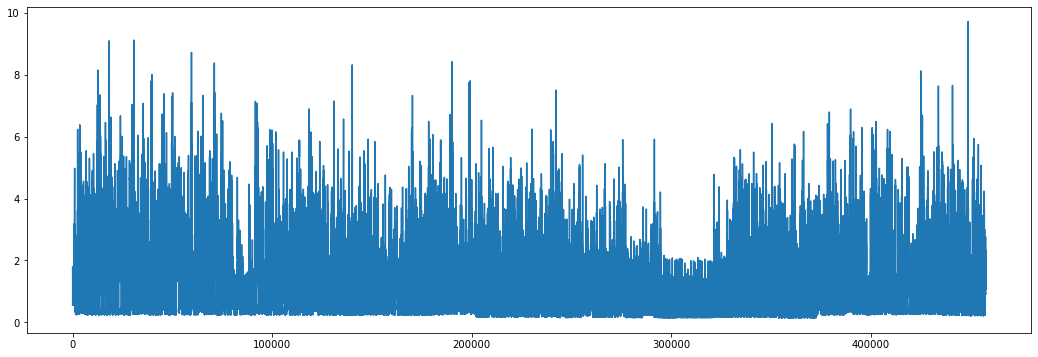

In [112]:
#Grafico
plt.figure(figsize = (18,6))
plt.plot(data_active_power['Global_active_power'])
plt.show()

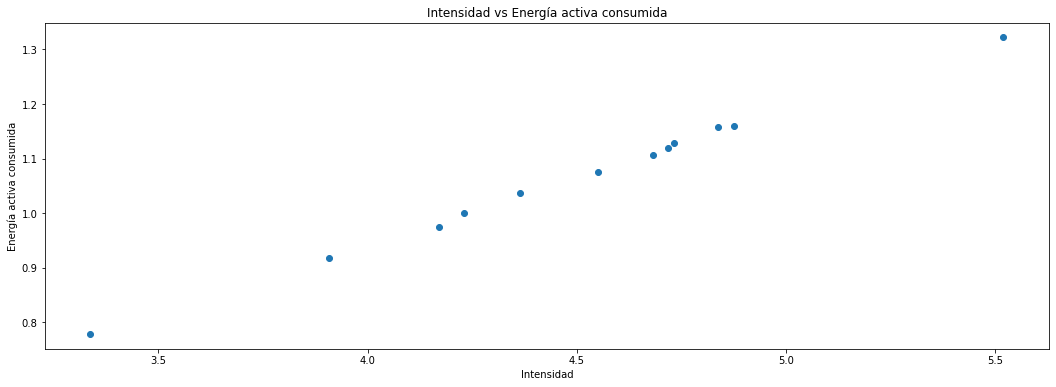

In [113]:
plt.figure(figsize = (18,6))
plt.title('Intensidad vs Energía activa consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía activa consumida')
plt.scatter(data_month['Global_intensity'], data_month['Global_active_power'])
plt.show()

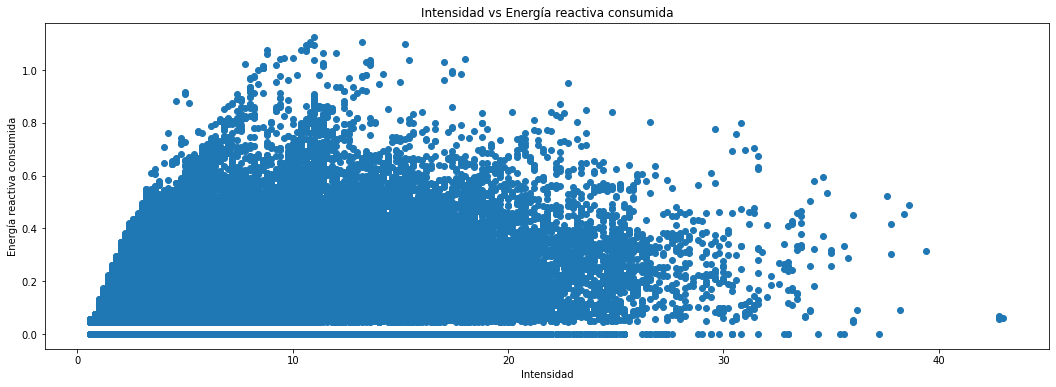

In [114]:
plt.figure(figsize = (18,6))
plt.title('Intensidad vs Energía reactiva consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía reactiva consumida')
plt.scatter(data_intensity['Global_intensity'], data_reactive_power['Global_reactive_power'])
plt.show()

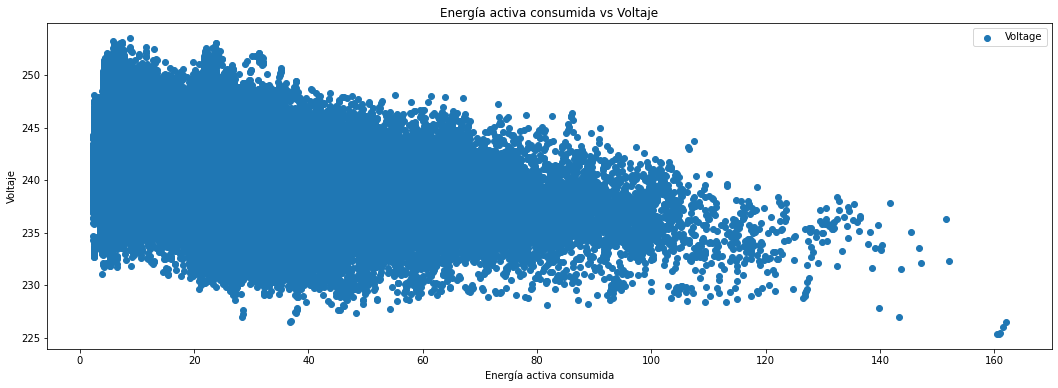

In [115]:
plt.figure(figsize = (18,6))
plt.title('Energía activa consumida vs Voltaje')
plt.xlabel('Energía activa consumida')
plt.ylabel('Voltaje')
plt.scatter(result3['Global_active_power_1060'], result3['Voltage'], label = 'Voltage')
plt.legend()

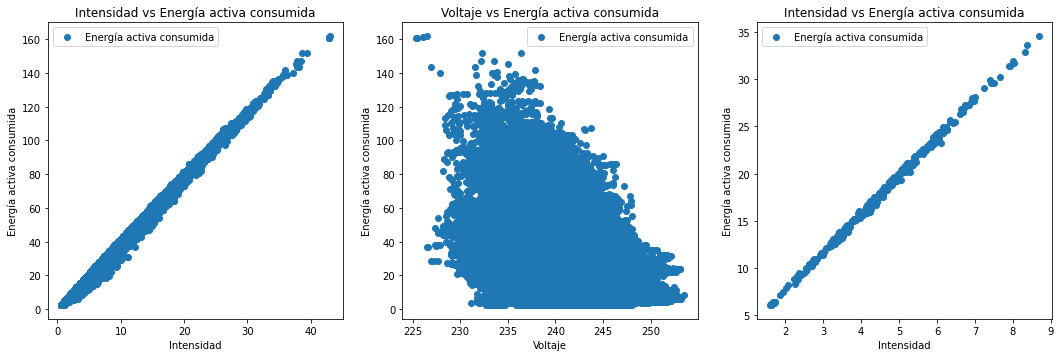

In [116]:
#Grafico la disperción de datos con los datos originales
plt.figure(figsize = (18,12))
plt.subplot(231)
plt.title('Intensidad vs Energía activa consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía activa consumida')
plt.scatter(result3['Global_intensity'], result3['Global_active_power_1060'], label = 'Energía activa consumida')
plt.legend()

plt.subplot(232)
plt.title('Voltaje vs Energía activa consumida')
plt.xlabel('Voltaje')
plt.ylabel('Energía activa consumida')
plt.scatter(result3['Voltage'], result3['Global_active_power_1060'], label = 'Energía activa consumida')
plt.legend()

plt.subplot(233)
plt.title('Intensidad vs Energía activa consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía activa consumida')
plt.scatter(data_day['Global_intensity'], data_day['Global_active_power_1060'], label = 'Energía activa consumida')
plt.legend()

Ahora, lo que procedemos hacer, es definir una función que nos ayude con el ajuste de cuervas y asimismo importamos `optimize` que será el encargado de ayudarnos en esto.

In [117]:
from scipy.optimize import curve_fit

def func1(x, a, b):
    return a*x+b
def func(X, a, b, c):
    x,y = X

Y hacemos la siguiente línea de código para obtener los coeficientes que nos ayudarán a hacer las líneas de ajuste y los errores que tienen cada coeficiente. `popt1` nos dará los coeficientes "a" y "b" para la línea de ajuste, `pcov2` nos dará el error del coeficiente "a" (esquina superior del array), y del coeficiente "b" (esquina inferior del array).

In [118]:
popt1, pcov1 = curve_fit(func1, result3['Global_intensity'], result3['Global_active_power_1060'])
np.sqrt(np.diag(pcov1))

array([0.0003101 , 0.00184445])

In [119]:
pcov1

array([[ 9.61612065e-08, -4.30652172e-07],
       [-4.30652172e-07,  3.40200608e-06]])

`pcov1` Sigma de a = 9.616e-08    sigma de b = 3.402e-06

Nota: Para hallar el error real, tendremos que sacar la raiz cuadrada de cada sigma.

In [120]:
popt1

array([ 3.9671033 , -0.08303407])

`popt1`
a =  3.967   b = -0.083

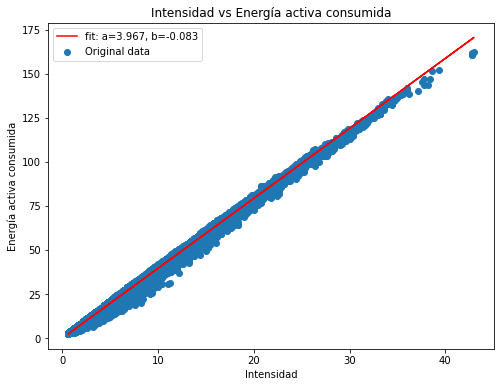

In [121]:
#Teniendo lo anterior, ya podemos graficar con tranquilidad.
plt.figure(figsize=(8,6))
plt.title('Intensidad vs Energía activa consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía activa consumida')
plt.plot(result3["Global_intensity"], func1(result3["Global_intensity"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(result3["Global_intensity"],result3["Global_active_power_1060"],label="Original data")
plt.legend()
plt.show()

In [122]:
popt2, pcov2 = curve_fit(func1, result3['Voltage'], result3['Global_active_power_1060'])
np.sqrt(np.diag(pcov2))

array([0.00733631, 1.77195546])

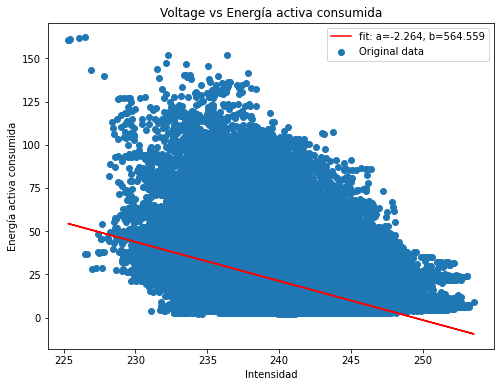

In [123]:
plt.figure(figsize=(8,6))
plt.title('Voltage vs Energía activa consumida')
plt.xlabel('Intensidad')
plt.ylabel('Energía activa consumida')
plt.plot(result3["Voltage"], func1(result3["Voltage"], *popt2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))
plt.scatter(result3["Voltage"],result3["Global_active_power_1060"],label="Original data")
plt.legend()
plt.show()

Para hacer las cosas más ligeras y automatizadas, se construyó la siguiente función ya vista en clase, de tal manera que no debamos hacer tantas líneas de código para graficar, para hallar los coeficientes "a" y "b" y ($\sqrt{\sigma ^{2}}$).

In [124]:
#Función rápida para calcular varias funciones
def get_fit(func,xdata,ydata,labelx,labely,r,t):
    
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    E = np.sqrt(np.mean((ydata-func(xdata, *popt))**2)) #Línea de código para Error
    x = np.linspace(xdata.min(),xdata.max(),100)
    plt.figure(figsize = (8,6))
    plt.plot(x, func(x, *popt), 'r-',label = r'fit: {}$\pm${}'.format(np.around(tuple(popt),r),tuple(pcov)))
    plt.scatter(xdata,ydata,label = "Original data")
    plt.title(t)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    
    #Líneas de código para coeficientes
    print("Los coeficients a y b son : {}".format(popt))
    print("Coeficientes sigma son : {}".format(pcov))
    
    #Línea de código para ver el Error
    print("Error a partir de la desviación estándar {}".format(E))
    
    return 

agregamos la línea:
```python
E = np.sqrt(np.mean((ydata-func(xdata, *popt))**2)) 
```
la cual nos calcula los coeficientes de sigma ${\sigma}$

Algo curioso de lo cual nos percatamos al momento de desarrollar este ejercicio, es que el DataFrame con un resample en días tiene datos NaN, es decir, datos vacíos. Estos espacios vacíos nos general un error a la hora de graficar como se muestra a continuación:

In [125]:
get_fit(func1,data_day["Voltage"],data_day["Global_active_power_1060"],"Voltage","Global_active_power_1060",2,"Datos Resample: Días")

ValueError: array must not contain infs or NaNs

Para corregir este error, lo que hacemos es apoyarnos en el método `dropna()` el cual nos ayuda a quitar dichos espacios vacíos que nos impiden graficar:

In [126]:
data_day = data_day.dropna()

Después de todo lo anterior ya estmoa listos para graficar libremente y comparar los resultados entre los datos con su respectivo resample

# Intensidad vs Energía activa consumida

Primer relación: $Global_active_power = A_1(Global .intensity) + B_1$  

Compararemos los 3 resultados y graficos de las variables Intensidad vs Energía activa consumida. tener muy en cuenta que "Energía activa consumida" está dado en $\frac{Vatios}{hora}$.

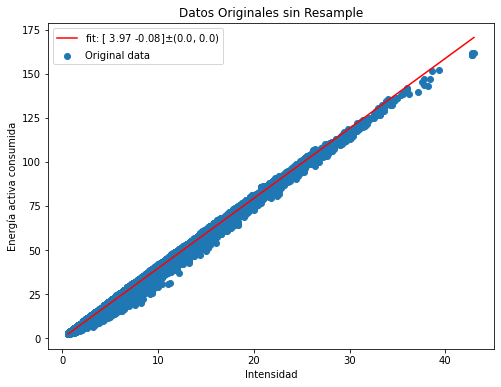

Los coeficients a y b son : [ 3.97 -0.08]
Coeficientes sigma son : [0. 0.]
Error a partir de la desviación estándar 0.8211508810916215


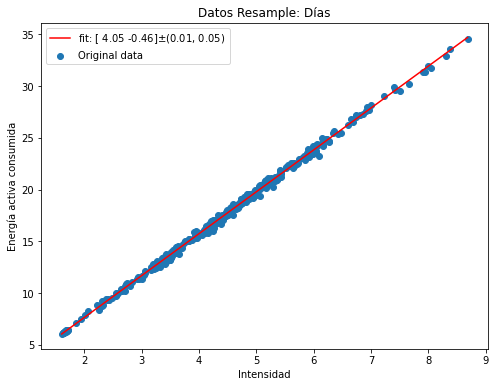

Los coeficients a y b son : [ 4.05 -0.46]
Coeficientes sigma son : [0.01 0.05]
Error a partir de la desviación estándar 0.253807908322183


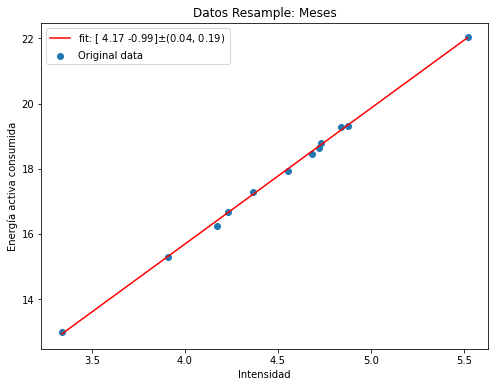

Los coeficients a y b son : [ 4.17 -0.99]
Coeficientes sigma son : [0.04 0.19]
Error a partir de la desviación estándar 0.06833056143135596


In [127]:
get_fit(func1,result3["Global_intensity"],result3["Global_active_power_1060"], 
        "Intensidad","Energía activa consumida",2,"Datos Originales sin Resample")

get_fit(func1,data_day["Global_intensity"],data_day["Global_active_power_1060"],
        "Intensidad","Energía activa consumida",2,"Datos Resample: Días")

get_fit(func1,data_month["Global_intensity"],data_month["Global_active_power_1060"],
        "Intensidad","Energía activa consumida",2,"Datos Resample: Meses")

#  Voltaje vs Energía activa consumida
Tenemos nuestra segunda relación la cual es: $Global.active.power = A_2(Voltage) + B_2$

Relacionaremos las variables de Voltaje y Energía activa consumida de igual manera como lo hicimos anteriormente.

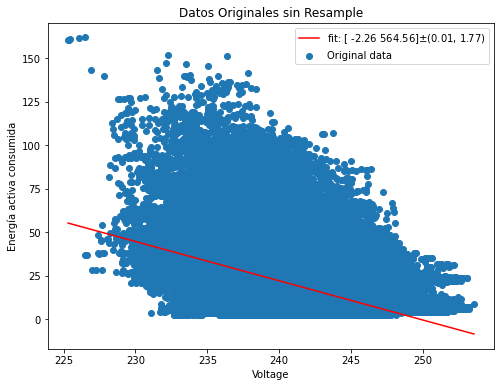

Los coeficients a y b son : [ -2.26 564.56]
Coeficientes sigma son : [0.01 1.77]
Error a partir de la desviación estándar 14.185590504912877


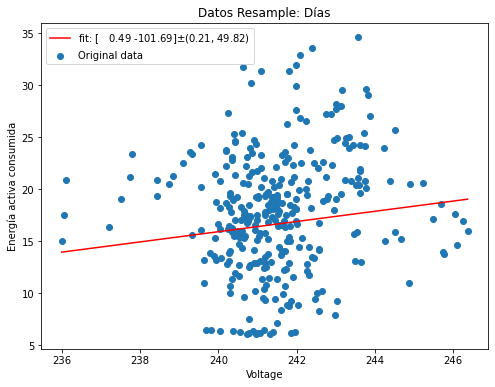

Los coeficients a y b son : [   0.49 -101.69]
Coeficientes sigma son : [ 0.21 49.82]
Error a partir de la desviación estándar 5.782938085245159


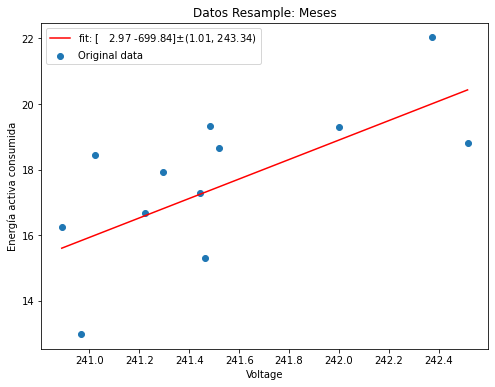

Los coeficients a y b son : [   2.97 -699.84]
Coeficientes sigma son : [  1.01 243.34]
Error a partir de la desviación estándar 1.6320135994866174


In [128]:
get_fit(func1,result3["Voltage"],result3["Global_active_power_1060"], 
        "Voltage","Energía activa consumida",2,"Datos Originales sin Resample")

get_fit(func1,data_day["Voltage"],data_day["Global_active_power_1060"],
        "Voltage","Energía activa consumida",2,"Datos Resample: Días")

get_fit(func1,data_month["Voltage"],data_month["Global_active_power_1060"],
        "Voltage","Energía activa consumida",2,"Datos Resample: Meses")

# Relación 3
La tercera relación consiste en: $Relación 2: Global.active.power = A_31(Global.intensity) + A_32(Voltage) + B_3$

Lamentablemente, en este Notebook, no se reproducirá esta tercera relación debido a la falta de conocimiento para hacer los ajustes de curva en el espacio. Mas sin embargo, visualizareos las tres casos en este tipo de plot 3D.

Una forma sencilla de graficar en 3D es:

Primero definimos las variables que necesitamos graficar

In [129]:
x1 = result3["Global_intensity"]
y1 = result3["Voltage"]
z1 = result3["Global_active_power_1060"]

Luego fijamos un parámetro  de tamaño.

In [130]:
plt.rcParams['figure.figsize'] = (8,6)

Seguido de eso, le decimos a Python que queremos un gráfico en 3D de la siguiente manera:
```python
 plt.axes(projection='3d')
```
Luego de eso simplemente le pedimos que grafique con las variables que antes fijamos de la manera:
```python
 ax1.scatter3D(x1, y1, z1)
```

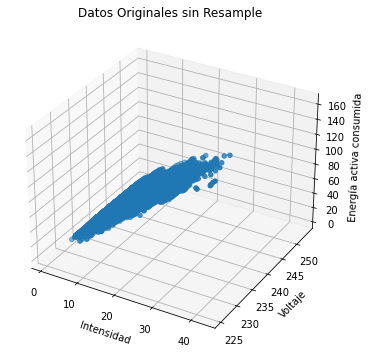

In [131]:
ax1 = plt.axes(projection='3d')

ax1.set_title('Datos Originales sin Resample')
ax1.set_xlabel('Intensidad')
ax1.set_ylabel('Voltaje')
ax1.set_zlabel('Energía activa consumida')


ax1.scatter3D(x1, y1, z1)

Luego de esto, simplemente repetimos para visualizar los demás datos.

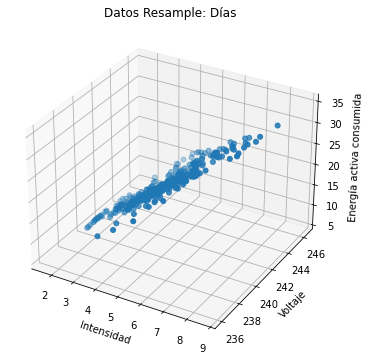

In [132]:
x2 = data_day["Global_intensity"]
y2 = data_day["Voltage"]
z2 = data_day["Global_active_power_1060"]

plt.rcParams['figure.figsize'] = (8,6)

ax2 = plt.axes(projection='3d')

ax2.set_title('Datos Resample: Días')
ax2.set_xlabel('Intensidad')
ax2.set_ylabel('Voltaje')
ax2.set_zlabel('Energía activa consumida')


ax2.scatter3D(x2, y2, z2, s=25)

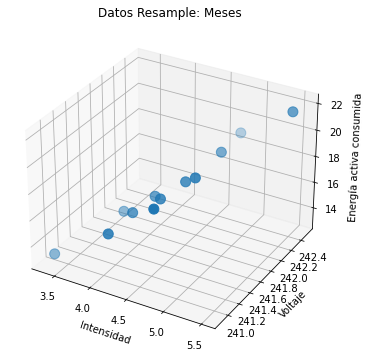

In [133]:
x3 = data_month["Global_intensity"]
y3 = data_month["Voltage"]
z3 = data_month["Global_active_power_1060"]

plt.rcParams['figure.figsize'] = (8,6)

ax3 = plt.axes(projection='3d')

ax3.set_title('Datos Resample: Meses')
ax3.set_xlabel('Intensidad')
ax3.set_ylabel('Voltaje')
ax3.set_zlabel('Energía activa consumida')


ax3.scatter3D(x3, y3, z3, s=100)

## Análisis y conclusiones
Como puede esperarse, dentro de este análisis no entrará la tercera relación puesto que no hay forma de justificarla. De ese modo, solamente tomaremos en cuenta la relación 1 y 2.

Un resumen de la desviación estándar que nos dió como resultado en cada uno de los casos es el siguiente:

| Relación | Error Datos originales | Error Datos-Resample: Dias |Error Datos-Resample: meses |
| --- | --- | --- | --- |
| 1 | 0.82115088 | 0.253807 | 0.0683305 |
| 2 | 14.18559 | 5.78293808 | 1.6320135 |

Como podemos ver en el resumen, hay una tendencia a la baja en la disperción de los datos a medida que los estos disminuyen con cada resample que se emplea, de esta manera llegamos a tener el valor más bajo en la desviación estándar de `0.0683305` que le pertenece a la relación de "Intensidad vs Energía activa consumida" con un resample en meses; y tenemos la más alta de `14.18559` que le pertenece a "Voltaje vs Energía activa consumida" con los datos originales. Podríamos intuir en que si la tendencia se mantiene, la tercera relación sufriría el mismo resultado; es decir, el error de la aproximación decrecería hacia un resample en días y aún más con un resample en meses meses.

# Referencias
+  Ref 1: [Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html)
+  Ref 2: [pandas.Series.resample](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html)
+  Ref 3: [Función rápida tomada](https://github.com/sierraporta/Herramientas-Computacionales-Basicas/blob/main/Notebooks/Ajuste_Curvas_Experimentales.ipynb)
+  Ref 4: [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
+  Ref 5: [Matplotlib: 3D Plots](https://github.com/kimfetti/Videos/blob/master/Matplotlib_Tips/12_3Dplots.ipynb)